# Analysis of the publication time

In [1]:
import pandas as pd

In [2]:
import configparser
config = configparser.ConfigParser()
config.read('memeconfig.ini')
data_path = config['DEFAULT']['data_path']
pickle_data_path = config['DEFAULT']['pickle_data_path']
viz_path = config['DEFAULT']['viz_data_path']

In [4]:
import numpy as np
import memebox.multilayergraph as mlg

In [143]:
def compute_components(text_data,day_list):
    # compute the components
    # return the multilayer graph and the graph of compressed components
    import numpy as np
    threshold = 3
    time_threshold = 2
    print('Computing the multilayer graph.')
    H = mlg.multilayergraph(text_data,day_list,threshold=threshold)
    print('Compressing the connected components.')
    G_all = mlg.compress_multilayer(H,time_threshold)
    G_all.graph['series_name'] = series_name
    G_all.graph['threshold'] = str(threshold)#str(threshold2)
    return H,G_all

In [144]:
def get_dates(graph):
    nb_documents_dic = {}
    for edge in graph.edges(data=True):
        if edge[2]['label'] == 'intralayer':
            textid_list = edge[2]['textid_list']
            #print(edge[2])
            if edge[2]['time_series'][0] in nb_documents_dic:
                list_data = nb_documents_dic[edge[2]['time_series'][0]]
                [list_data.append(data_id) for data_id in textid_list]
                nb_documents_dic[edge[2]['time_series'][0]] = list_data
            else:
                list_data = []
                [list_data.append(data_id) for data_id in textid_list]
                nb_documents_dic[edge[2]['time_series'][0]] = list_data

    for key in nb_documents_dic:
         nb_documents_dic[key] = len(set(nb_documents_dic[key]))#list(set(nb_documents_dic[key]))
    return nb_documents_dic

In [35]:
import networkx as nx

In [140]:
def compute_activity(text_data):
    threshold = 3
    time_threshold = 2
    # for the year 2015
    year = 2015
    list_of_component_dates = []
    for month in range(1,13):
        day_list = mlg.hours_of_month(year,month) 
        print('Computing the multilayer graph.')
        H = mlg.multilayergraph(text_data,day_list,threshold=threshold)    
        for cc in nx.weakly_connected_component_subgraphs(H,copy=True):
            #print('getting the dates')
            nb_documents_dic = get_dates(cc)
            # if the link appears in more than 2 documents
            if len(nb_documents_dic)>2:
                #print('adding the component data')
                list_of_component_dates.append(nb_documents_dic)
    year = 2016
    for month in range(1,10):
        day_list = mlg.hours_of_month(year,month)
        print('Computing the multilayer graph.')
        H = mlg.multilayergraph(text_data,day_list,threshold=threshold)    
        for cc in nx.weakly_connected_component_subgraphs(H,copy=True):
            #print('getting the dates')
            nb_documents_dic = get_dates(cc)
            # if the link appears in more than 2 documents
            if len(nb_documents_dic)>2:
                print('adding the component data')
                list_of_component_dates.append(nb_documents_dic)
    return list_of_component_dates

In [145]:
def hour_sample(list_of_component_dates):
    #a series per component
    s_list = []
    for cc in list_of_component_dates:
        s_list.append(pd.Series(cc, name='occur'))
    # series with the values of all the components
        stotal = pd.Series()
    for serie in s_list:
        stotal = stotal.append(serie)    
    # hourly activity:
    # Change all the days to the 01 01 2017
    import datetime
    s_hours = pd.Series()
    for (idx,value) in stotal.iteritems():
        s_hours[datetime.datetime.combine(datetime.date(2017,1,1),idx.time())] = value
    return s_hours

In [141]:
series_name = 'baron_noir'
#series_name = 'marseille'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
vocab_file = pickle_data_path+series_name+'_vocab_bow'+'.pkl'
tfidf_file = pickle_data_path+series_name+'_vocab_tfidf'+'.pkl'
text_data = pd.read_pickle(pickle_file)
vocab_data = pd.read_pickle(vocab_file)
tfidf_data = pd.read_pickle(tfidf_file)

In [142]:
activity_baron_noir = compute_activity(text_data)

Dates are from 00-01-01-2015 to 23-31-01-2015.
Computing the multilayer graph.
Nb of edges: 140, nb of nodes: 198.
Dates are from 00-01-02-2015 to 23-28-02-2015.
Computing the multilayer graph.
Nb of edges: 554, nb of nodes: 416.
Dates are from 00-01-03-2015 to 23-31-03-2015.
Computing the multilayer graph.
Nb of edges: 111, nb of nodes: 144.
Dates are from 00-01-04-2015 to 23-30-04-2015.
Computing the multilayer graph.
Nb of edges: 218, nb of nodes: 319.
Dates are from 00-01-05-2015 to 23-31-05-2015.
Computing the multilayer graph.
Nb of edges: 696, nb of nodes: 749.
Dates are from 00-01-06-2015 to 23-30-06-2015.
Computing the multilayer graph.
Nb of edges: 2505, nb of nodes: 2246.
Dates are from 00-01-07-2015 to 23-31-07-2015.
Computing the multilayer graph.
Nb of edges: 1138, nb of nodes: 1149.
Dates are from 00-01-08-2015 to 23-31-08-2015.
Computing the multilayer graph.
Nb of edges: 727, nb of nodes: 779.
Dates are from 00-01-09-2015 to 23-30-09-2015.
Computing the multilayer grap

In [146]:
s_hours_baron_noir = hour_sample(activity_baron_noir)

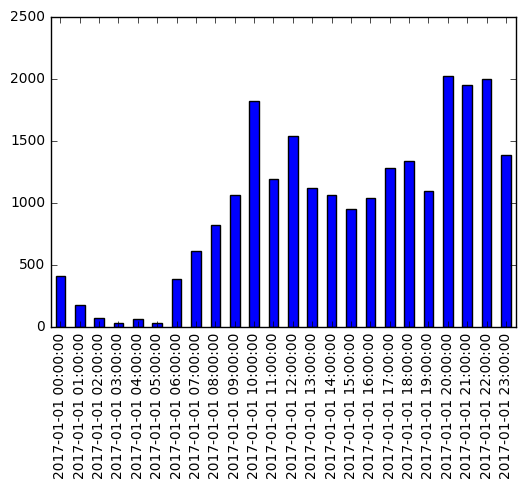

In [147]:
import matplotlib.pyplot as plt
#pd.Series.plot(kind='line',s_list[1])
ss = s_hours_baron_noir.resample('60T').sum()
ss.plot(kind='bar')
plt.show()

In [148]:
series_name = 'marseille'
#series_name = 'marseille'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
vocab_file = pickle_data_path+series_name+'_vocab_bow'+'.pkl'
tfidf_file = pickle_data_path+series_name+'_vocab_tfidf'+'.pkl'
text_data = pd.read_pickle(pickle_file)
vocab_data = pd.read_pickle(vocab_file)
tfidf_data = pd.read_pickle(tfidf_file)
activity_marseille = compute_activity(text_data)
s_hours_marseille = hour_sample(activity_marseille)

Dates are from 00-01-01-2015 to 23-31-01-2015.
Computing the multilayer graph.
Nb of edges: 1016, nb of nodes: 903.
Dates are from 00-01-02-2015 to 23-28-02-2015.
Computing the multilayer graph.
Nb of edges: 286, nb of nodes: 392.
Dates are from 00-01-03-2015 to 23-31-03-2015.
Computing the multilayer graph.
Nb of edges: 1151, nb of nodes: 1084.
Dates are from 00-01-04-2015 to 23-30-04-2015.
Computing the multilayer graph.
Nb of edges: 123, nb of nodes: 174.
Dates are from 00-01-05-2015 to 23-31-05-2015.
Computing the multilayer graph.
Nb of edges: 6129, nb of nodes: 4650.
Dates are from 00-01-06-2015 to 23-30-06-2015.
Computing the multilayer graph.
Nb of edges: 250, nb of nodes: 371.
Dates are from 00-01-07-2015 to 23-31-07-2015.
Computing the multilayer graph.
Nb of edges: 5608, nb of nodes: 4407.
Dates are from 00-01-08-2015 to 23-31-08-2015.
Computing the multilayer graph.
Nb of edges: 3402, nb of nodes: 3145.
Dates are from 00-01-09-2015 to 23-30-09-2015.
Computing the multilayer

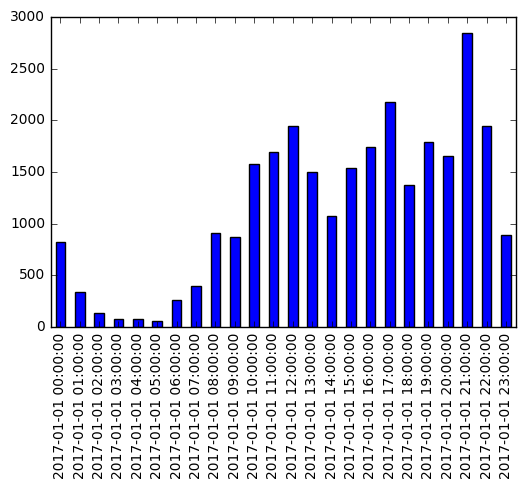

In [149]:
import matplotlib.pyplot as plt
#pd.Series.plot(kind='line',s_list[1])
ss = s_hours_marseille.resample('60T').sum()
ss.plot(kind='bar')
plt.show()

In [150]:
series_name = 'LBDL'
#series_name = 'marseille'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
vocab_file = pickle_data_path+series_name+'_vocab_bow'+'.pkl'
tfidf_file = pickle_data_path+series_name+'_vocab_tfidf'+'.pkl'
text_data = pd.read_pickle(pickle_file)
vocab_data = pd.read_pickle(vocab_file)
tfidf_data = pd.read_pickle(tfidf_file)
activity_LBDL = compute_activity(text_data)
s_hours_LBDL = hour_sample(activity_LBDL)

Dates are from 00-01-01-2015 to 23-31-01-2015.
Computing the multilayer graph.
Nb of edges: 45, nb of nodes: 82.
Dates are from 00-01-02-2015 to 23-28-02-2015.
Computing the multilayer graph.
Nb of edges: 582, nb of nodes: 584.
Dates are from 00-01-03-2015 to 23-31-03-2015.
Computing the multilayer graph.
Nb of edges: 421, nb of nodes: 597.
Dates are from 00-01-04-2015 to 23-30-04-2015.
Computing the multilayer graph.
Nb of edges: 16516, nb of nodes: 13688.
Dates are from 00-01-05-2015 to 23-31-05-2015.
Computing the multilayer graph.
Nb of edges: 27498, nb of nodes: 23320.
Dates are from 00-01-06-2015 to 23-30-06-2015.
Computing the multilayer graph.
Nb of edges: 23488, nb of nodes: 17182.
Dates are from 00-01-07-2015 to 23-31-07-2015.
Computing the multilayer graph.
Nb of edges: 1474, nb of nodes: 1559.
Dates are from 00-01-08-2015 to 23-31-08-2015.
Computing the multilayer graph.
Nb of edges: 284, nb of nodes: 369.
Dates are from 00-01-09-2015 to 23-30-09-2015.
Computing the multila

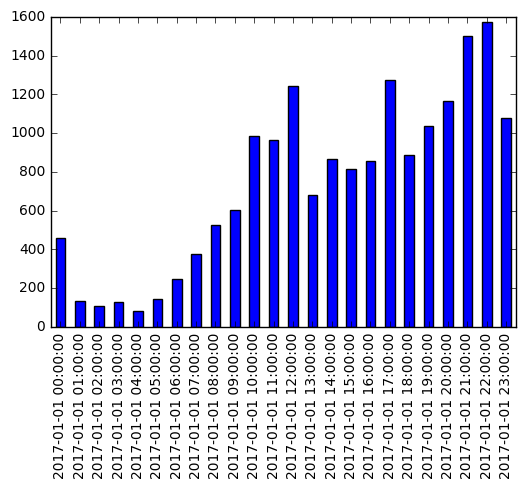

In [151]:
import matplotlib.pyplot as plt
#pd.Series.plot(kind='line',s_list[1])
ss = s_hours_LBDL.resample('60T').sum()
ss.plot(kind='bar')
plt.show()

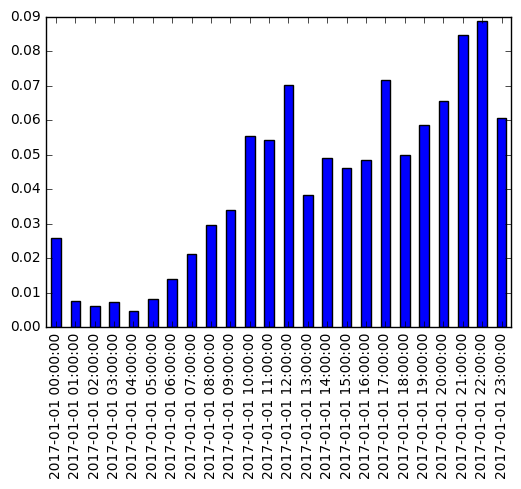

In [152]:
import matplotlib.pyplot as plt
#pd.Series.plot(kind='line',s_list[1])
ss = s_hours.resample('60T').sum()
ss[ss.keys()] = ss.values/sum(ss.values)
ss.plot(kind='bar')
plt.show()

In [166]:
# resampling to one hour
sr_LBDL = s_hours_LBDL.resample('60T').sum()
sr_marseille = s_hours_marseille.resample('60T').sum()
sr_baron_noir = s_hours_baron_noir.resample('60T').sum()

# converting to percentages
ssr_LBDL = sr_LBDL.copy()
ssr_LBDL[ssr_LBDL.keys()] = ssr_LBDL.values/sum(ssr_LBDL.values)
ssr_marseille = sr_marseille.copy()
ssr_marseille[ssr_marseille.keys()] = ssr_marseille.values/sum(ssr_marseille.values)
ssr_baron_noir = sr_baron_noir.copy()
ssr_baron_noir[ssr_baron_noir.keys()] = ssr_baron_noir.values/sum(ssr_baron_noir.values)

<IPython.core.display.Javascript object>


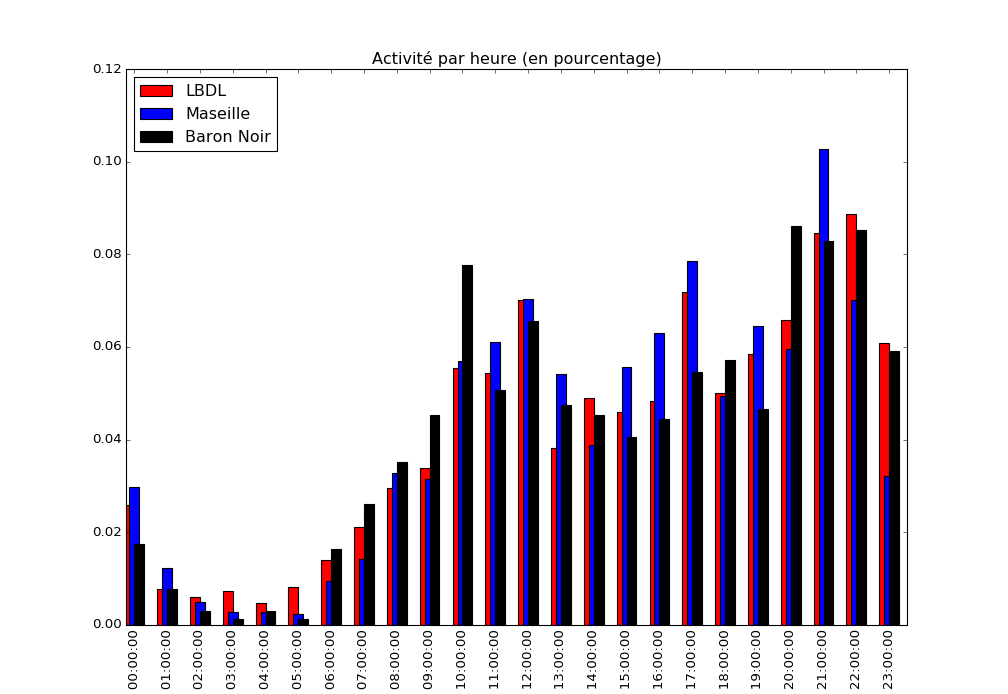

In [178]:
%matplotlib notebook 
#ax = plt.figure()
width=0.3
ssr_LBDL.plot(kind='bar',color='red',position=1, label ='LBDL',width=width)
ssr_marseille.plot(kind='bar',label='Maseille',width=width)
ssr_baron_noir.plot(kind='bar',color='black',position=0,label='Baron Noir',width=width)
plt.legend(loc='best')
plt.title('Activité par heure (en pourcentage)')
plt.show()

## Mean time length of the components for each series

In [187]:
def minute_length(list_of_component_dates):
    # return list of comopnents length in hour
    #a series per component
    len_list = []
    for cc in list_of_component_dates:
        s = pd.Series(cc, name='occur').resample('1T').sum()
        s_len = len(s)
        len_list.append(s_len)
    return len_list

In [191]:
print ('Valeur moyenne')
print('LBDL: {}'.format(np.mean(minute_length(activity_LBDL))))
print('Marseille: {}'.format(np.mean(minute_length(activity_marseille))))
print('Baron Noir: {}'.format(np.mean(minute_length(activity_baron_noir))))
print ('Ecart type')
print('LBDL: {}'.format(np.std(minute_length(activity_LBDL))))
print('Marseille: {}'.format(np.std(minute_length(activity_marseille))))
print('Baron Noir: {}'.format(np.std(minute_length(activity_baron_noir))))

Valeur moyenne
LBDL: 171.0251256281407
Marseille: 232.36866359447004
Baron Noir: 189.42448979591836
Ecart type
LBDL: 194.50511709138388
Marseille: 300.5737563081037
Baron Noir: 229.96736106533018


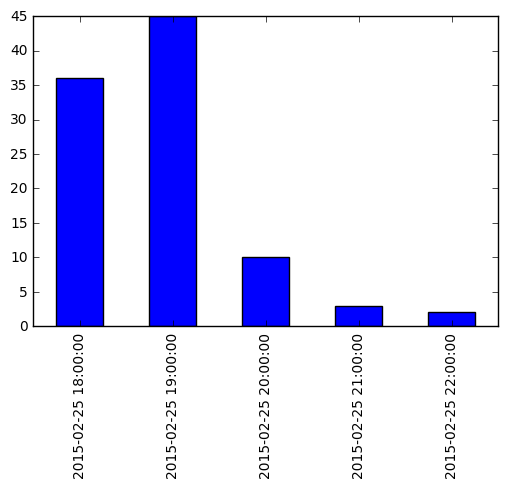

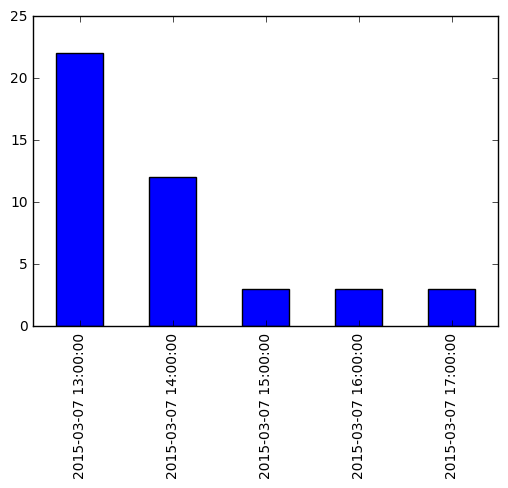

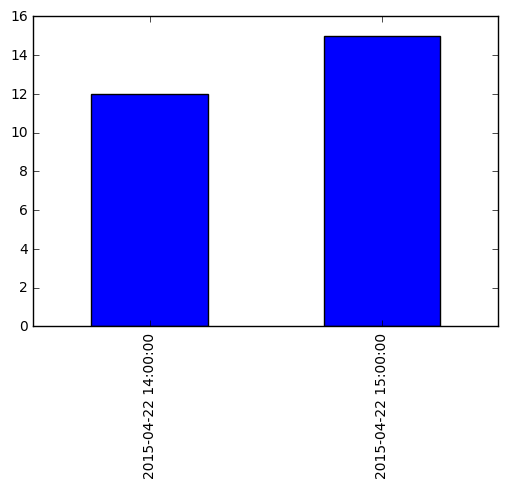

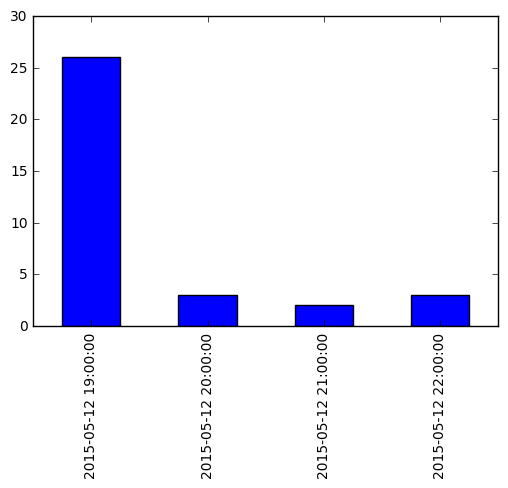

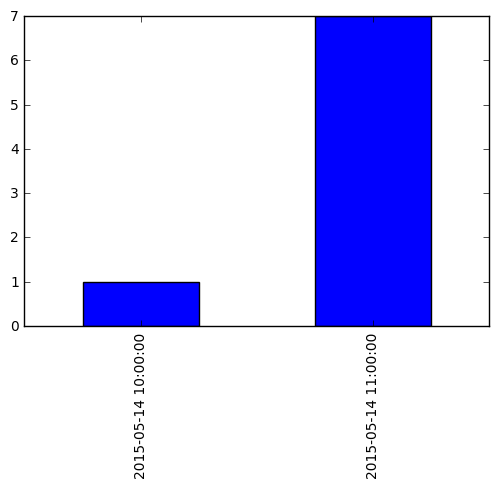

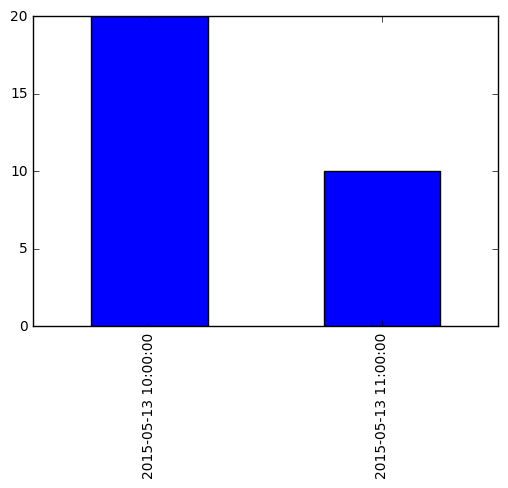

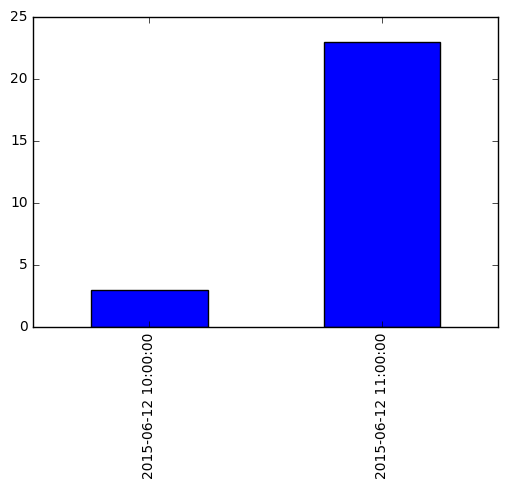

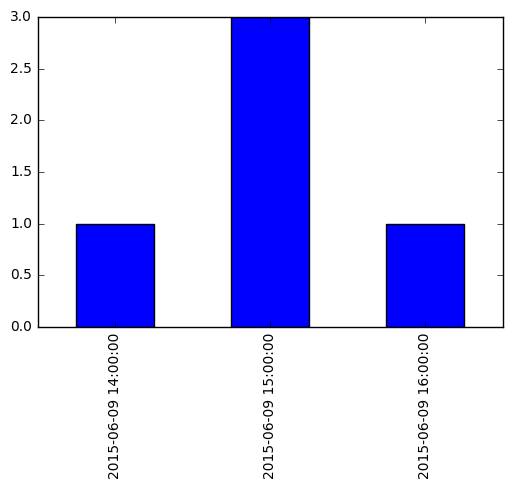

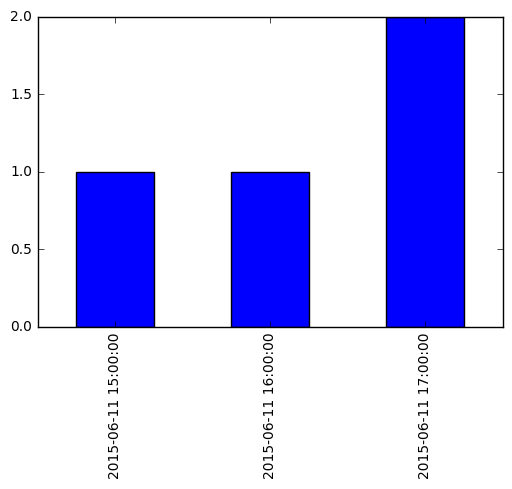

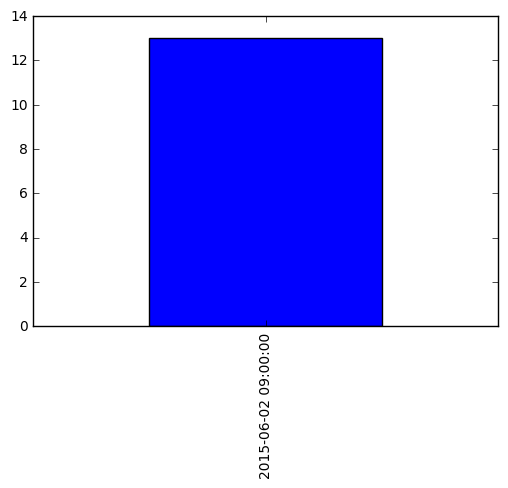

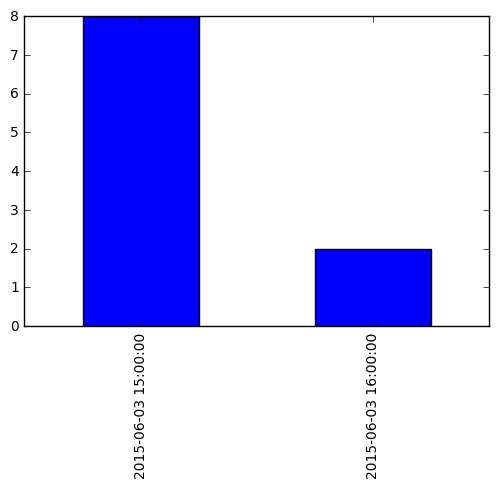

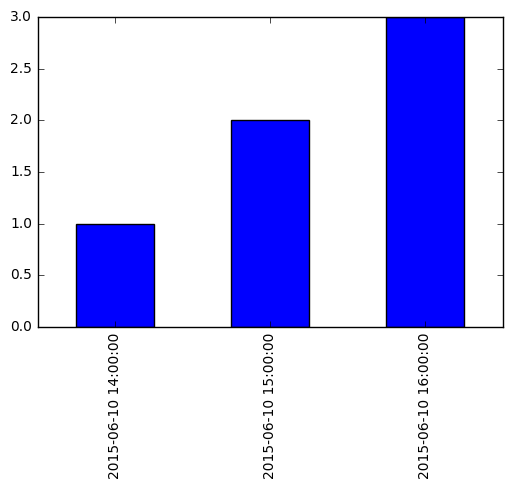

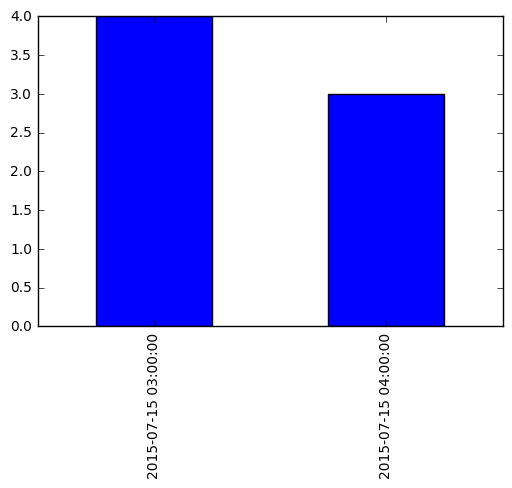

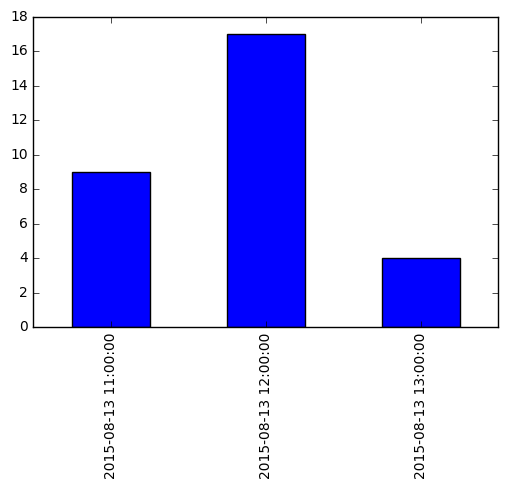

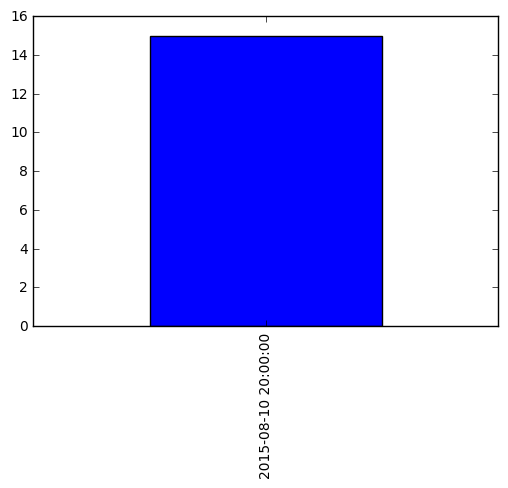

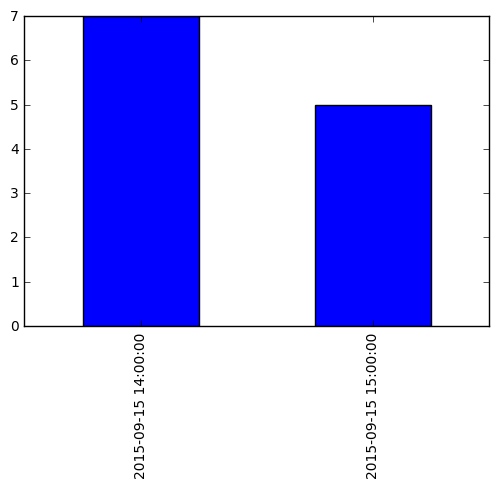

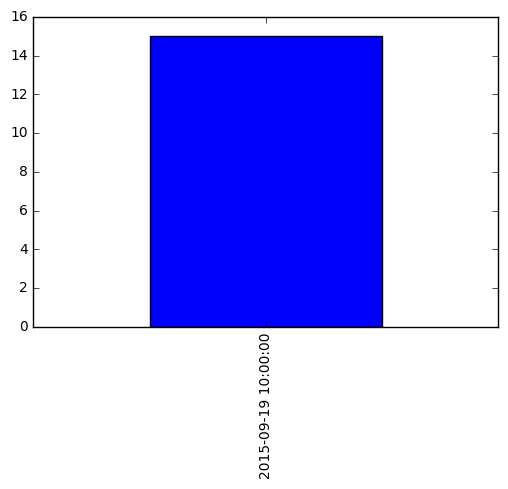

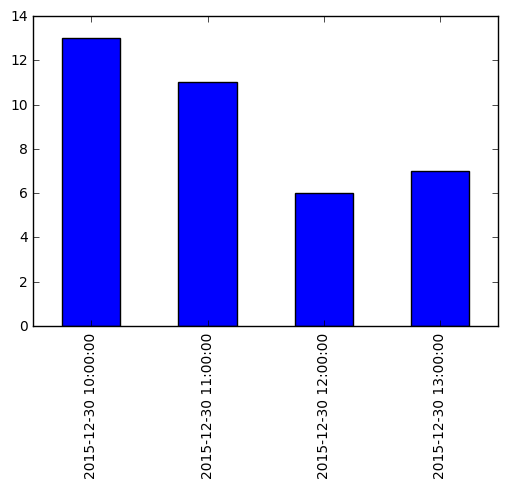

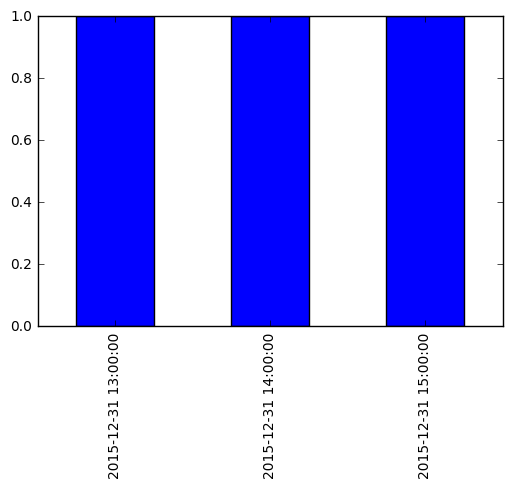

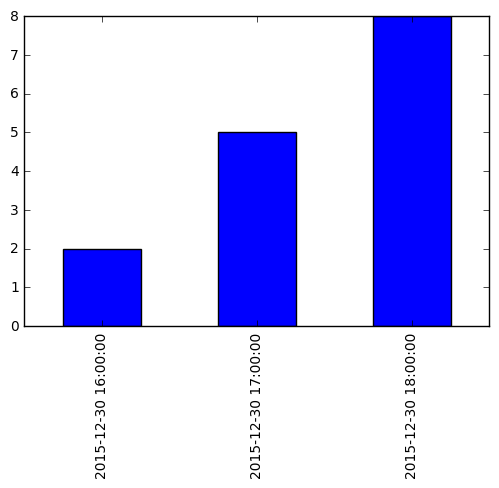

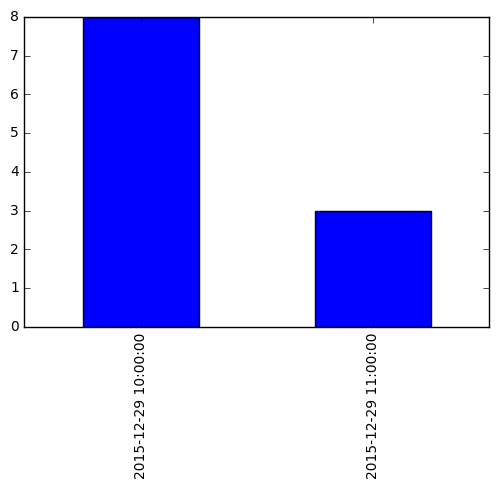

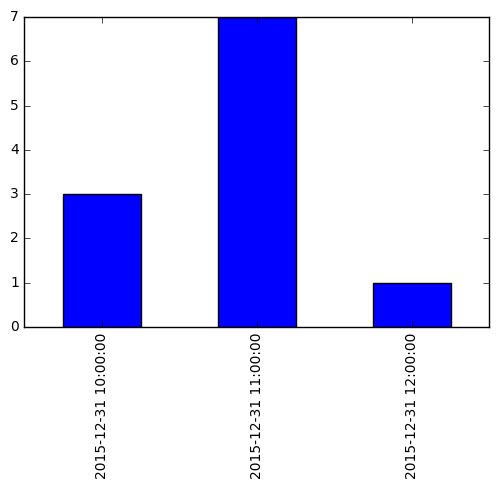

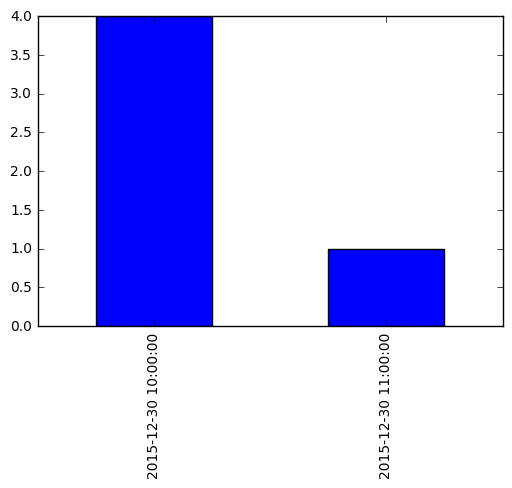

In [62]:
nb_series = len(s_list)
for i,serie in enumerate(s_list):
    #plt.subplot(nb_series,1,i+1)
    ss = serie.resample('60T').sum()
    ss.plot(kind='bar')
    plt.show()

In [8]:
# for the year 2015
year = 2015
list_of_component_dates = []
for month in range(1,13):
    day_list = mlg.hours_of_month(year,month)
    threshold = 3
    time_threshold = 2
    print('Computing the multilayer graph.')
    H = mlg.multilayergraph(text_data,day_list,threshold=threshold)    
    list_of_df = mlg.extract_components_as_timetables(H,path=None,items='edges')

Dates are from 00-01-01-2015 to 23-31-01-2015.
Computing the multilayer graph.
Nb of edges: 140, nb of nodes: 198.
[38, 38, 38]


ValueError: Must have equal len keys and value when setting with an iterable